In [6]:
import pandas as pd
from pandas import read_csv
import numpy as np
from datetime import datetime
import pickle
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

In [8]:
fname = r'conditions_df.pkl'
df = pickle.load(open(fname,"rb"))
df['DateEntry']=pd.to_datetime(df['DateEntry'])
monthCounts=df['DateEntry'].groupby([df.DateEntry.dt.year,df.DateEntry.dt.month]).agg('count')

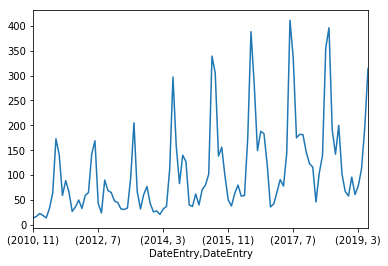

In [9]:
monthCounts.plot()

In [29]:
def plot_rolling_statistics(monthCounts):
    rolmean = monthCounts.rolling(window=12).mean()
    rolstd = monthCounts.rolling(window=12).std()

    #Plot rolling statistics:
    data = monthCounts.plot(color='blue',label='Original Data')
    rolling_mean = rolmean.plot(color='red', label='Rolling Mean')
    rolling_std = rolstd.plot(color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)

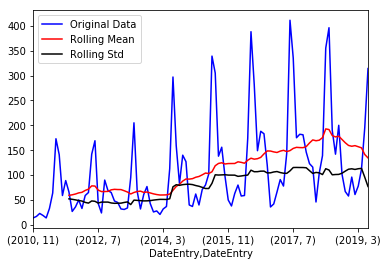

In [30]:
plot_rolling_statistics(monthCounts)

In [37]:
monthCounts=df['DateEntry'].groupby([df.DateEntry.dt.year,df.DateEntry.dt.month]).agg('count').to_frame('c')

In [39]:
monthCounts['c']

DateEntry  DateEntry
2010       11            14
           12            17
2011       1             23
           2             19
           3             14
           4             33
           5             64
           6            173
           7            141
           8             59
           9             89
           10            66
           11            27
           12            36
2012       1             50
           2             33
           3             59
           4             65
           5            142
           6            169
           7             43
           8             24
           9             90
           10            69
           11            65
           12            48
2013       1             45
           2             32
           3             31
           4             34
                       ... 
2017       1             42
           2             66
           3             91
           4             78

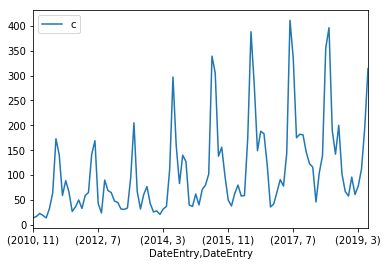

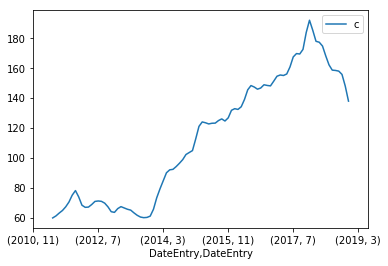

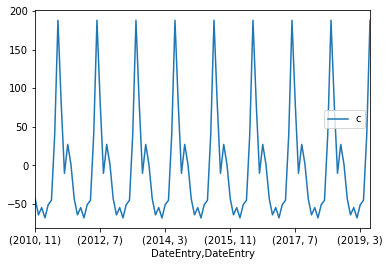

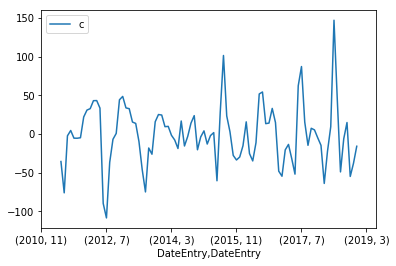

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthCounts,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

monthCounts.plot(label='Original')
trend.plot(label='Trend')
seasonal.plot(label='Seasonality')
residual.plot(label='Residuals')
#plt.show()
#plt.tight_layout()

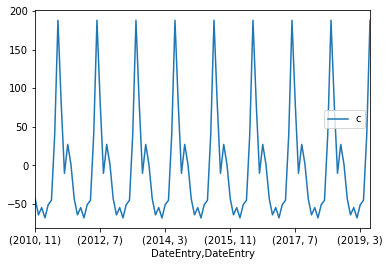

In [44]:
seasonal.plot()